In [13]:
import pandas as pd
s_train = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)

/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_6239/1907568209.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s_train = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)


In [14]:
from adtk.data import validate_series
s_train = validate_series(s_train)
print(s_train)

               Price      Open      High       Low    Vol. Change %
Date                                                               
2020-06-17   9,473.3   9,534.4   9,566.0   9,261.3   3.14K   -0.64%
2020-06-18   9,400.0   9,473.3   9,496.4   9,287.2   1.66K   -0.77%
2020-06-19   9,315.5   9,400.0   9,439.9   9,241.8   2.62K   -0.90%
2020-06-20   9,371.3   9,315.5   9,401.0   9,178.6   1.87K    0.60%
2020-06-21   9,298.1   9,371.3   9,431.1   9,292.1   1.34K   -0.78%
...              ...       ...       ...       ...     ...      ...
2022-09-16  19,809.9  19,717.0  19,894.0  19,350.0   6.95K    0.47%
2022-09-17  20,127.0  19,809.9  20,206.0  19,770.0  13.67K    1.60%
2022-09-18  19,424.0  20,127.0  20,127.0  19,356.0   2.43K   -3.49%
2022-09-19  19,544.5  19,424.0  19,684.0  18,318.0  11.97K    0.62%
2022-09-20  19,261.0  19,544.5  19,634.0  19,193.0   9.31K   -1.45%

[826 rows x 6 columns]


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

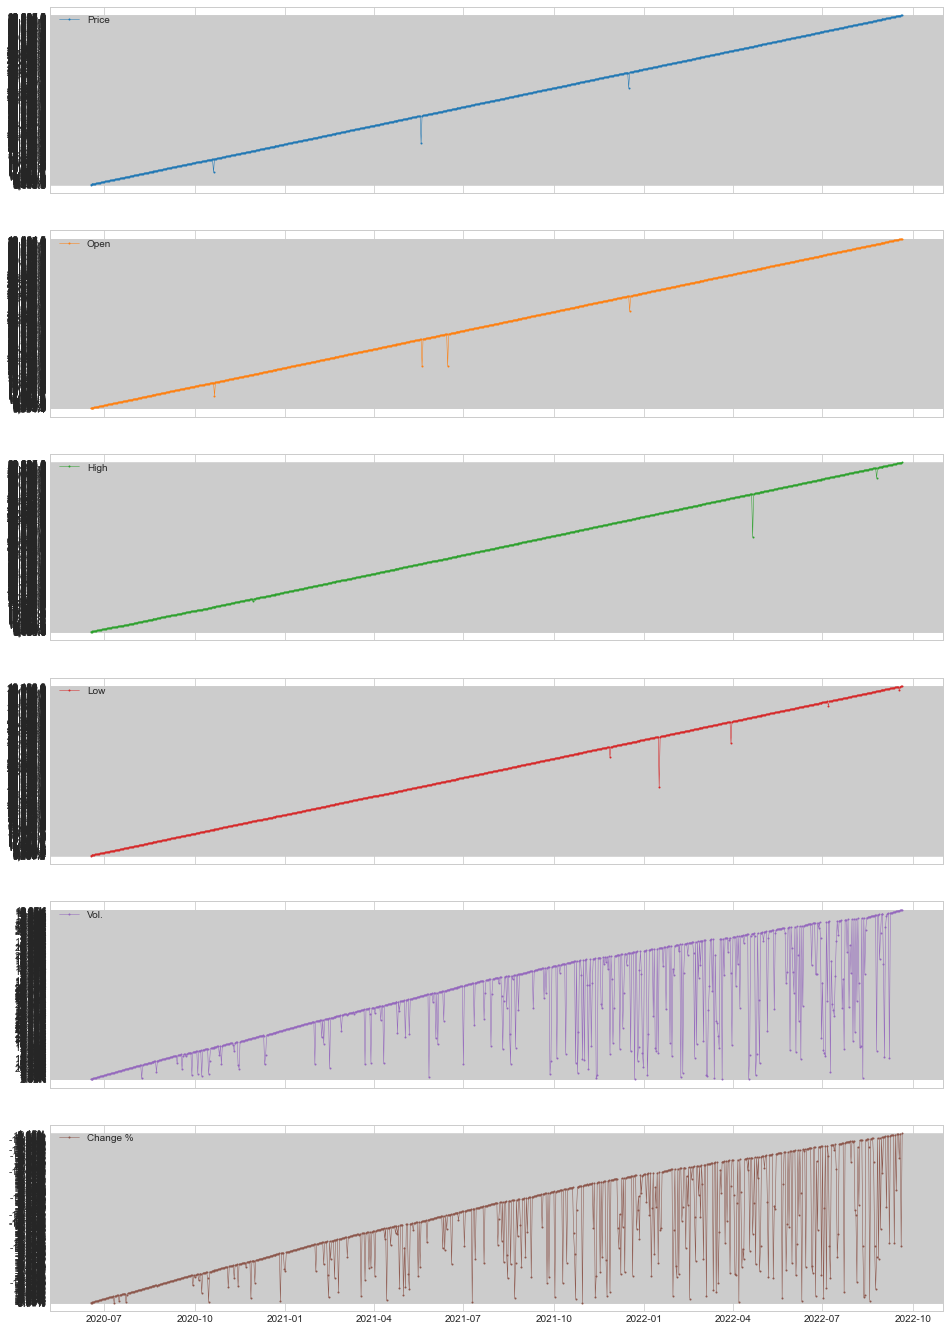

In [15]:
from adtk.visualization import plot
plot(s_train)

from adtk.data import resample
s_train = resample(s_train, dT="15 min")

In [12]:
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD()
anomalies = seasonal_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")

RuntimeError: Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.